In [1]:
# Adds link to the scripts folder
import sys
import os
sys.path.append("../../scripts/")
import matplotlib.pyplot as plt
import numpy as np

from trajectory import Trajectory, create_trajectory_list, create_all_patient_trajectories
from hivevo.patients import Patient
import filenames
import copy
from activity import get_average_activity

# Activity plots

## Functions

Format of the dictionnaries : trajectories[region][rev/non_rev/syn/non_syn]

In [2]:
def make_trajectory_dict(remove_one_point=False):
    regions = ["env", "pol", "gag"]
    trajectories = {}

    for region in regions:
        # Create the dictionary with the different regions
        tmp_trajectories = create_all_patient_trajectories(region)
        if remove_one_point:
            tmp_trajectories = [traj for traj in tmp_trajectories if traj.t[-1] != 0]
        trajectories[region] = tmp_trajectories

        # Split into sub dictionnaries (rev, non_rev and all)
        rev = [traj for traj in trajectories[region] if traj.reversion == True]
        non_rev = [traj for traj in trajectories[region] if traj.reversion == False]
        syn = [traj for traj in trajectories[region] if traj.synonymous == True]
        non_syn = [traj for traj in trajectories[region] if traj.synonymous == False]
        trajectories[region] = {"rev": rev, "non_rev": non_rev,
                                "syn": syn, "non_syn": non_syn, "all": trajectories[region]}
        
    return trajectories
    
    
        
def make_activity_dict(min_freq=0.0, normalize=True):
    regions = ["env", "pol", "gag"]
    activities = {}
    for region in regions:
        tmp_dict = {}
        for traj_type in ["rev", "non_rev", "syn", "non_syn", "all"]:
            tmp_traj = [traj for traj in trajectories[region][traj_type] if np.sum(traj.frequencies>min_freq, dtype=bool)]
            tmp_dict[traj_type] = get_average_activity(tmp_traj, True)
        activities[region] = tmp_dict

    time_bins = activities["env"]["rev"]["time_bins"]
    
    return time_bins, activities


def plot_activities(time_bins, activities, title):
    regions = ["env", "pol", "gag"]
    # Red is fixed, blue is lost, green is active
    colors = ["r", "b", "g"]
    fontsize=16
    fontsize2 = 20

    fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(16,10), sharex=True, sharey=True)
    fig.suptitle(title, fontsize=fontsize2)

    for idx_row, split_type in enumerate([["rev", "non_rev"], ["syn", "non_syn"]]):
        for idx_col, region in enumerate(regions):
            for idx_colors, activity in enumerate(["fixed", "lost", "active"]):
                axs[idx_row, idx_col].plot(time_bins, activities[region][split_type[0]][activity], f'{colors[idx_colors]}-')
                axs[idx_row, idx_col].plot(time_bins, activities[region][split_type[1]][activity], f'{colors[idx_colors]}--')
                axs[idx_row, idx_col].grid()
                if idx_row == 1:
                    axs[idx_row,idx_col].set_xlabel("Time [days]", fontsize=fontsize)
                if idx_col == 0:
                    axs[idx_row,idx_col].set_ylabel("Frequency", fontsize=fontsize)
                    axs[idx_row,idx_col].text(-0.3, 0.45, split_type[0], transform=axs[idx_row,idx_col].transAxes, fontsize=fontsize2)
                if idx_row == 0:
                    axs[idx_row,idx_col].text(0.45, 1.1, region, transform=axs[idx_row,idx_col].transAxes, fontsize=fontsize2)

    fig.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.show()

## Plot by regions

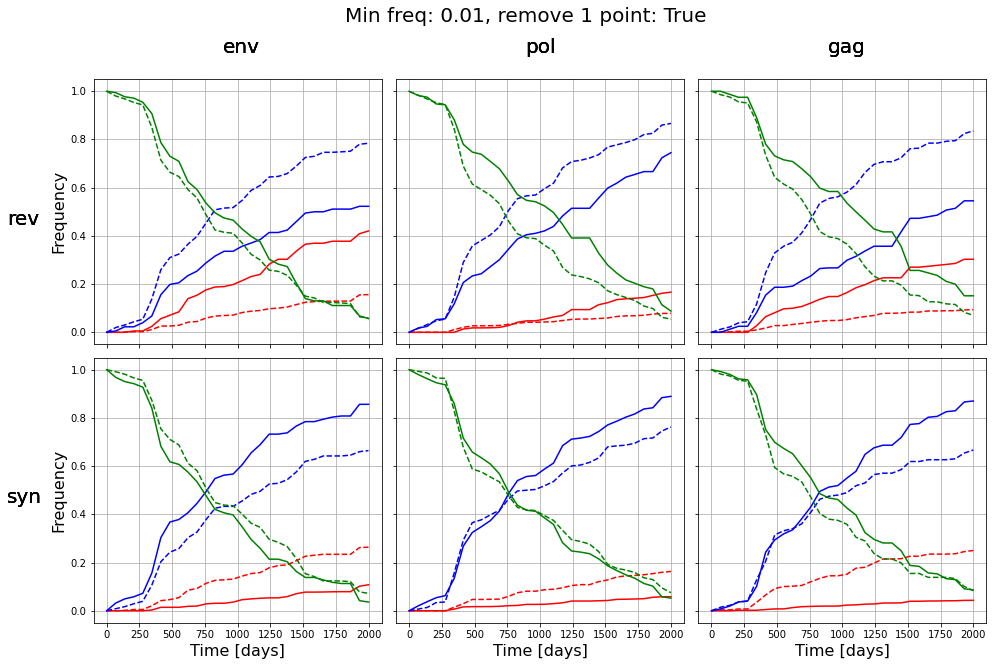

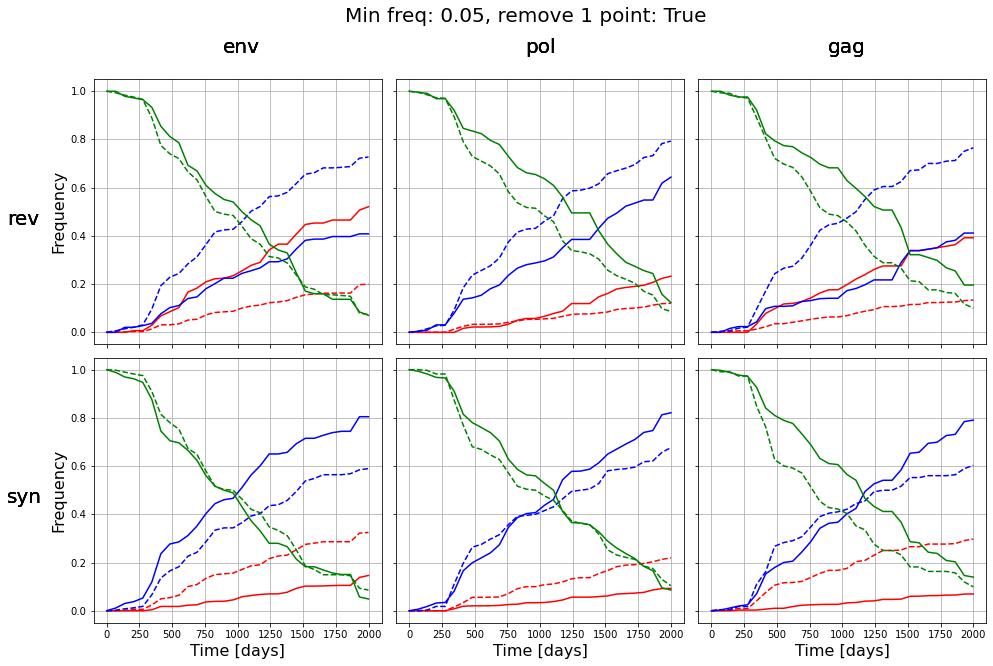

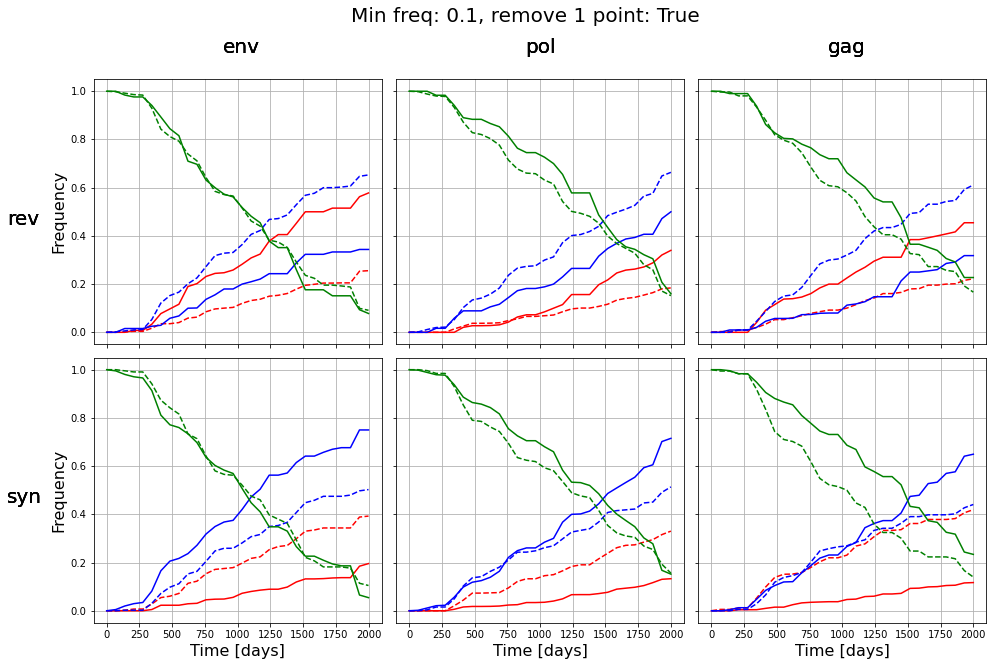

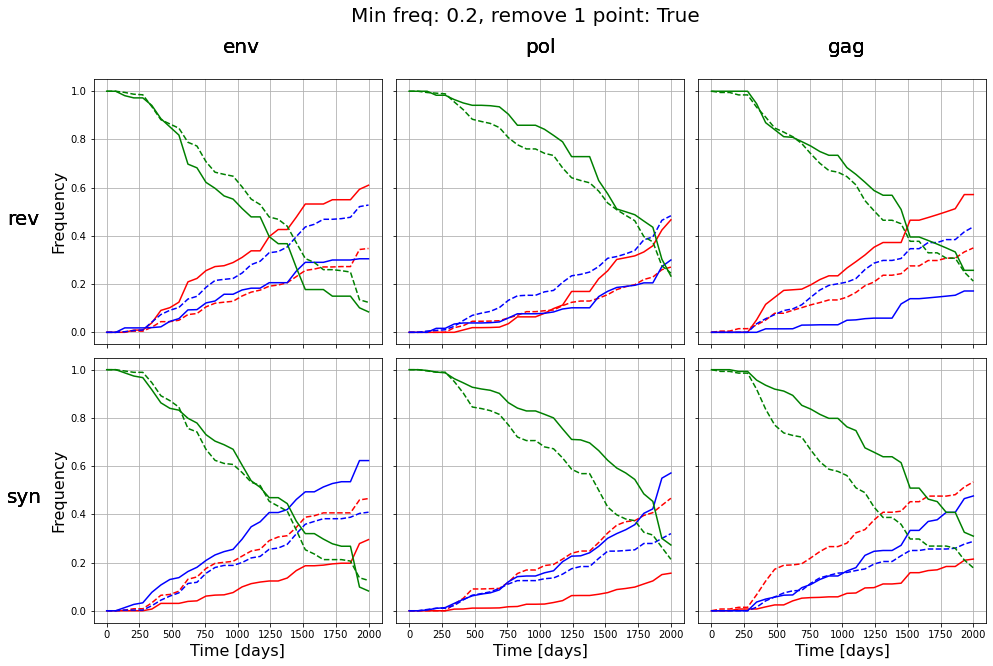

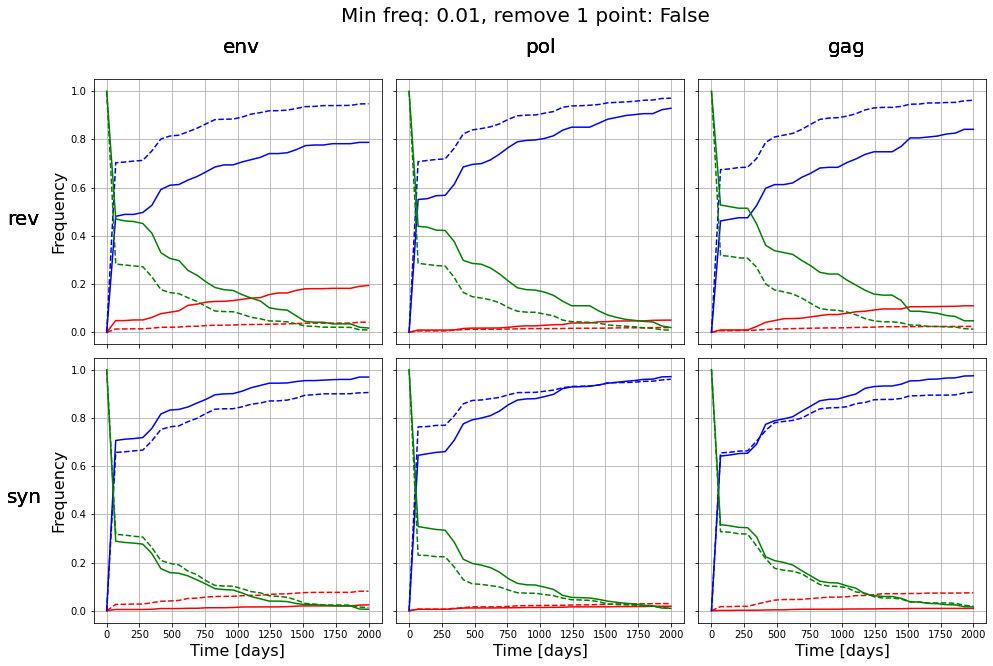

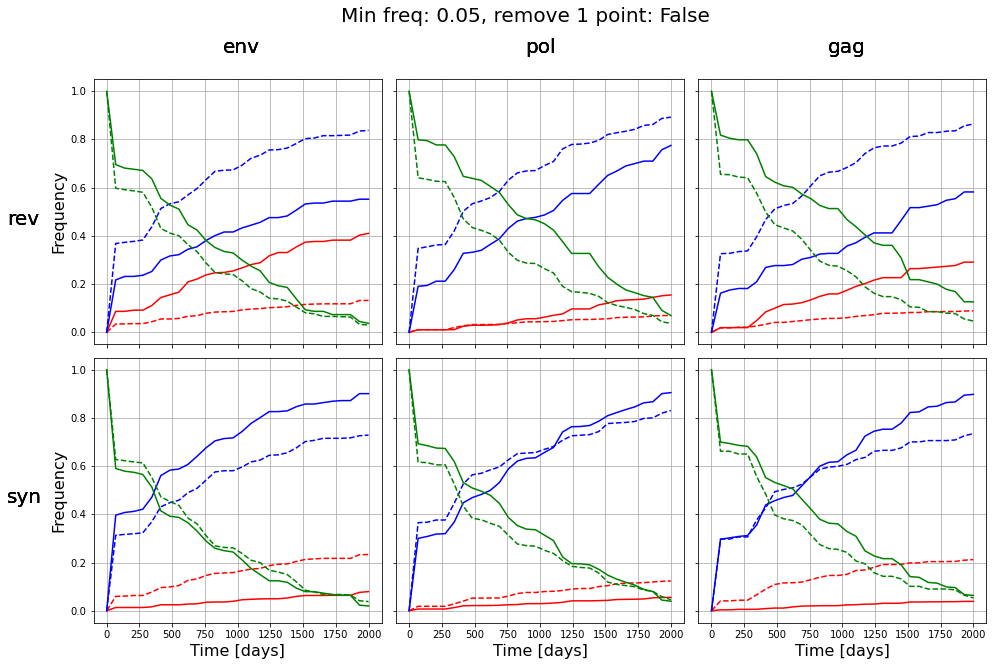

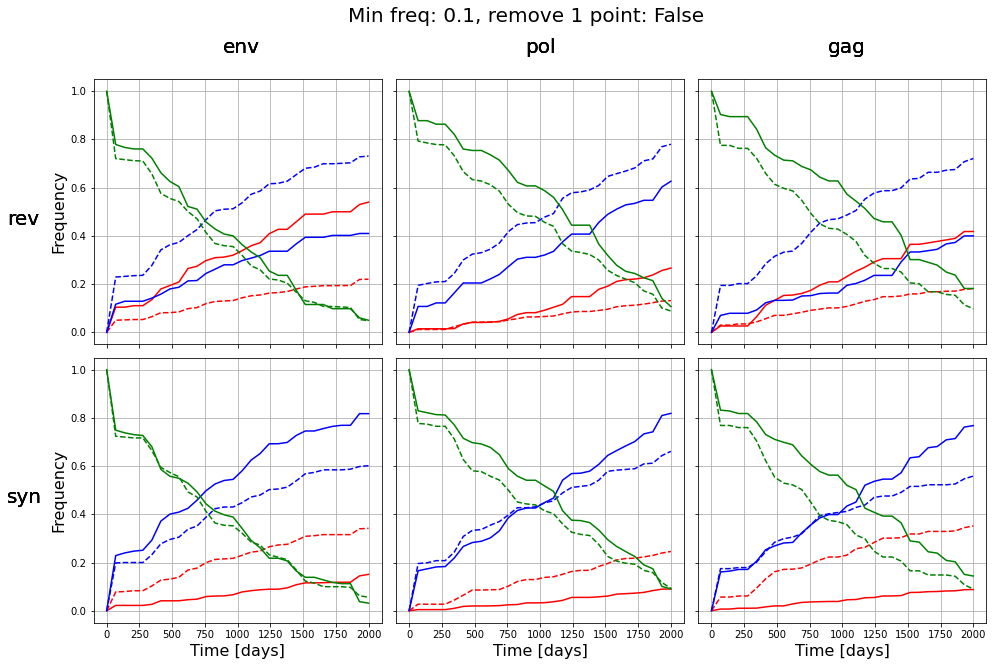

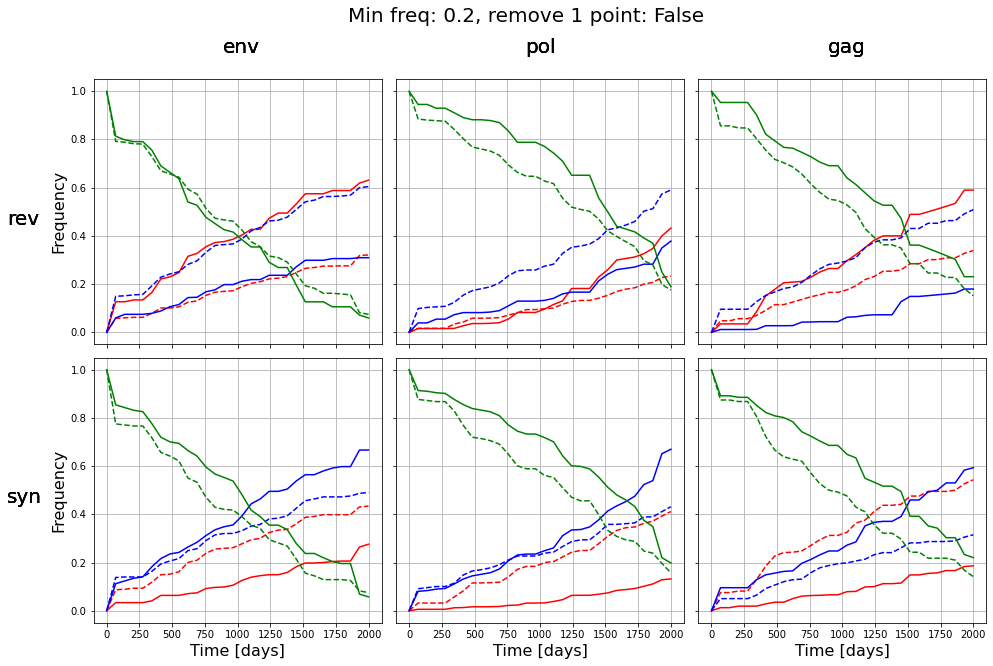

In [23]:
min_freqs = [0.01, 0.05, 0.1, 0.2]
remove_one_points = [True, False]

for remove_one_point in remove_one_points:
    for min_freq in min_freqs:
        trajectories = make_trajectory_dict(remove_one_point)
        time_bins, activities = make_activity_dict(min_freq)
        plot_activities(time_bins, activities, title=f"Min freq: {min_freq}, remove 1 point: {remove_one_point}")

# Plot 2

In [11]:
def plot_activity(time_bins, activities, savefig=False, fontsize=16):
    regions = ["env", "pol", "gag"]
    colors = ["r","b","g"]
    plt.figure(figsize=(14,10))
    for ii, region in enumerate(regions):
        plt.plot(time_bins, activities[region]["all"]["active"], '-', color=colors[ii], label=region)
        plt.plot(time_bins, activities[region]["rev"]["active"], '--', color=colors[ii], label="rev " + region)
    plt.grid()
    plt.xlabel("Time [days]", fontsize=fontsize)
    plt.ylabel("Frequency", fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.ylim([-0.05, 1.05])
    plt.tight_layout()
    
    if savefig:
        plt.savefig(savefig+".pdf", format="pdf")
    plt.show()

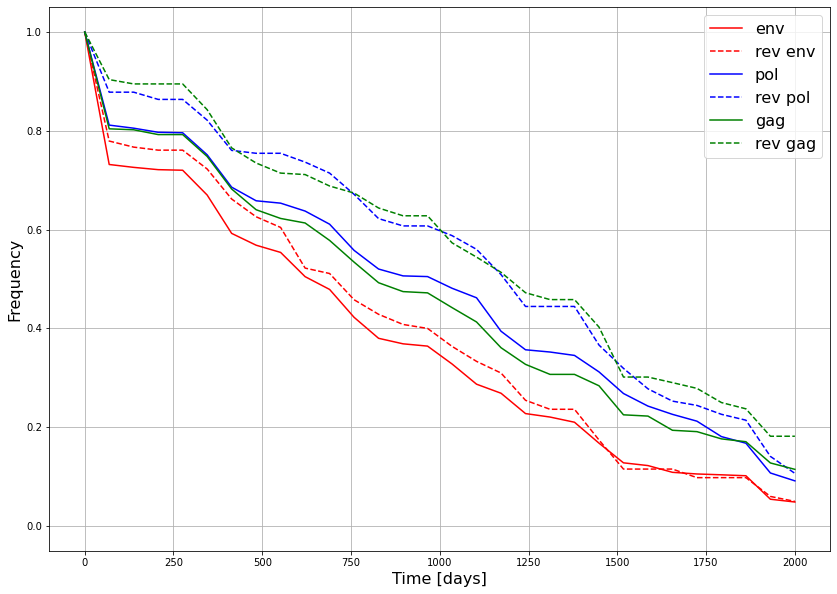

In [7]:
min_freq = 0.1
trajectories = make_trajectory_dict()
time_bins, activities = make_activity_dict(min_freq)
     
plot_activity(time_bins, activities)

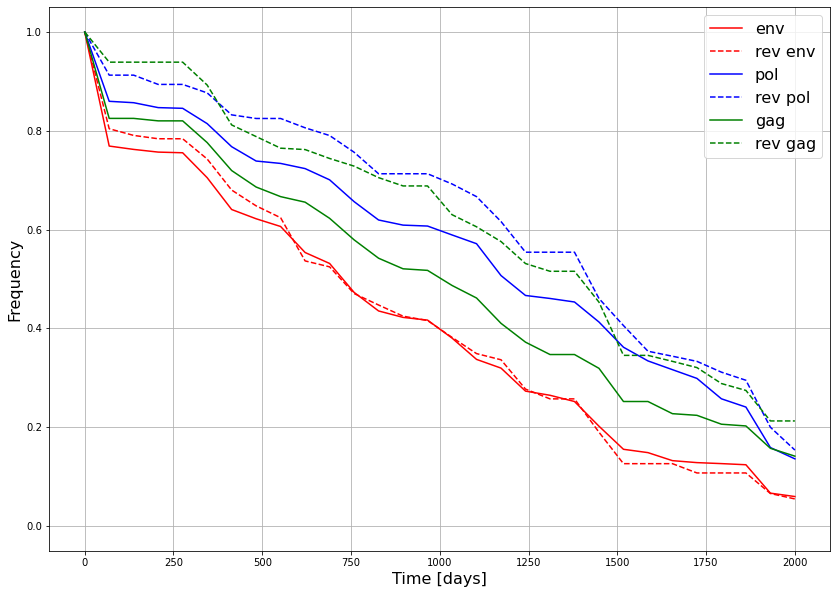

In [8]:
min_freq = 0.15
trajectories = make_trajectory_dict()
time_bins, activities = make_activity_dict(min_freq)
     
plot_activity(time_bins, activities)

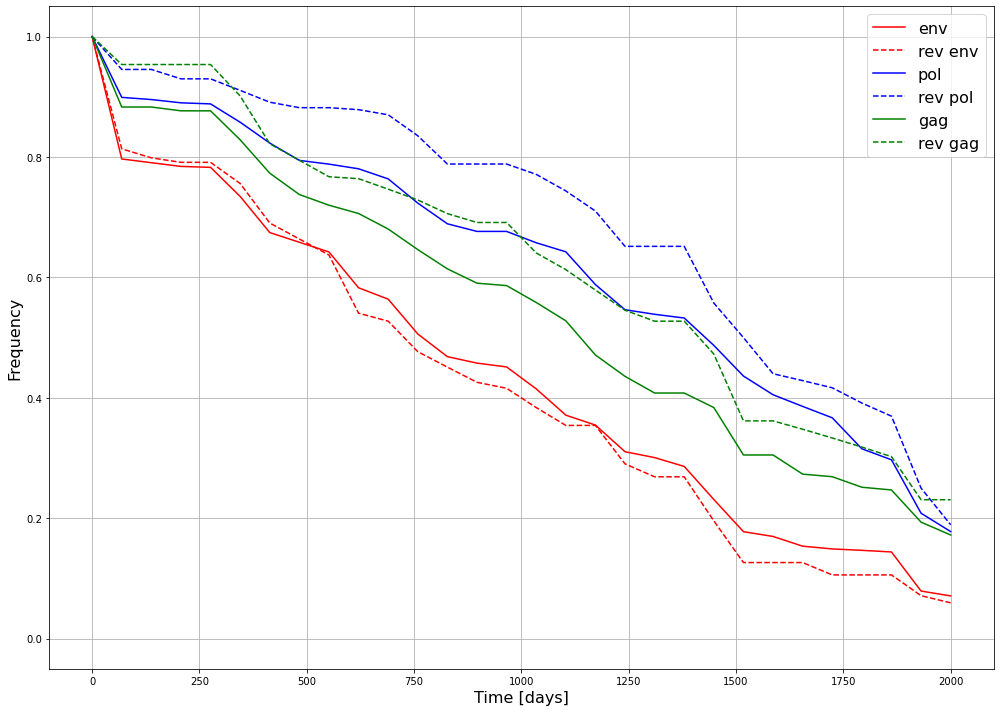

In [12]:
min_freq = 0.2
trajectories = make_trajectory_dict()
time_bins, activities = make_activity_dict(min_freq)
     
plot_activity(time_bins, activities, savefig="Mean_activity")